# Data on the number of fires in Brazil

## Analysis of a dataset containing information on the number of fires in various regions of Brazil from 1998 to 2017

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Description of features

In [102]:
# Read the data
data_raw = pd.read_csv('amazon.csv', encoding='latin1')
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


The dataset contains 6454 objects and 5 features
- year - Year of fires
- state - The state that had the fires
- month - Fire month
- number - Number of registered fires for the specified month
- date - Date of entry of fire data

In [185]:
data_raw.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


Categorical features include the year and month of fires, as well as the state in which they were registered

There is a numerical sign in the dataset - this is the number of fires for a given period of time

There are no binary features in the dataset

Let's look at the number of unique values in categorical columns

In [186]:
data_raw[['state', "month", "date"]].nunique()

state    23
month    12
date     20
dtype: int64

In [187]:
data_raw["state"].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

Column "state" - column with the maximum number of unique values - 23

From the info table we see that there are no gaps in the dataset, for each object all features are defined

In [13]:
data_raw.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


### Anomalies

Let's look at the distribution of the number of fires by years and months

In [103]:
# In the new dataframe, we will take all the columns, except for "date", because it is not informative
columns = ["year", "state", "month", "number"]
data = data_raw.loc[:, data_raw.columns.isin(columns)]

Text(0.5, 0, 'number')

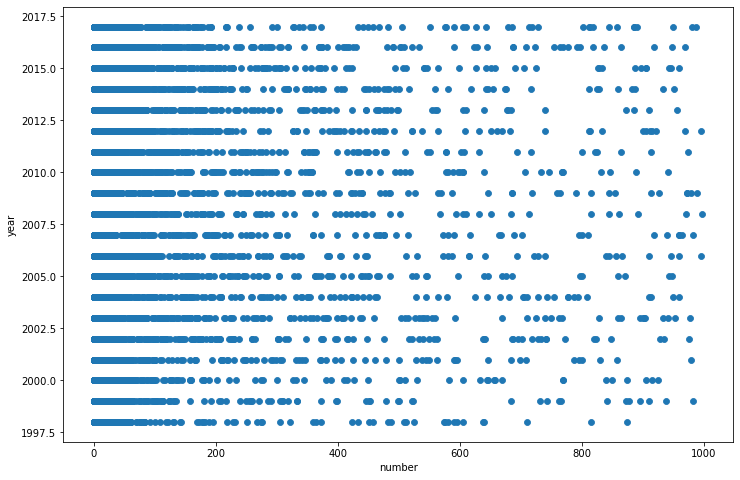

In [104]:
plt.figure(figsize=(12,8))
plt.scatter(data["number"], data["year"], linewidth=0.8)

plt.ylabel('year')
plt.xlabel('number')

The anomalies or outlier in our case could be too many fires, but we can notice that they are distributed over the years in a rather similar way: a larger number of fires occurs less frequently each year. There are no single values that are very different from others in this dataset

Text(0.5, 0, 'number')

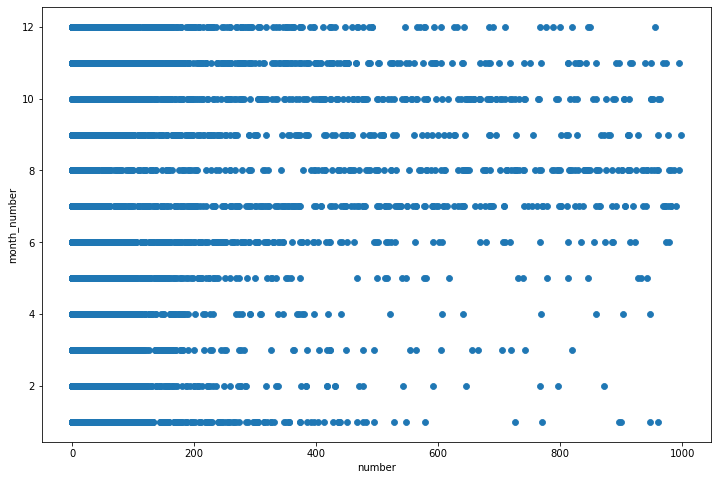

In [105]:
months_map = {'Janeiro' : 1, 'Fevereiro' : 2, 'Março' : 3, 'Abril' : 4, 'Maio' : 5, 'Junho' : 6,
             'Julho' : 7, 'Agosto' : 8, 'Setembro' : 9, 'Outubro' : 10, 'Novembro' : 11, 'Dezembro' : 12}

data['month_number'] = data['month']
for mon in months_map.keys():
    data['month_number'] = np.where(data['month_number'] == mon, int(months_map[mon]), data['month_number'])

plt.figure(figsize=(12,8))
plt.scatter(data["number"], data["month_number"], linewidth=0.8)

plt.ylabel('month_number')
plt.xlabel('number')

In [ ]:
s_map = {'Janeiro' : 1, 'Fevereiro' : 2, 'Março' : 3, 'Abril' : 4, 'Maio' : 5, 'Junho' : 6,
             'Julho' : 7, 'Agosto' : 8, 'Setembro' : 9, 'Outubro' : 10, 'Novembro' : 11, 'Dezembro' : 12}

data['month_number'] = data['month']
for s in s_map.keys():
    data['month_number'] = np.where(data['month_number'] == s, int(months_map[mon]), data['month_number'])

In [123]:
pd.pivot_table(data1, columns = 'IsSouthWest', values = 'number', aggfunc = sum)[0:10]

IsSouthWest,0,1
number,603434,95117


In [94]:
data["state"]

0            Acre
1            Acre
2            Acre
3            Acre
4            Acre
          ...    
6449    Tocantins
6450    Tocantins
6451    Tocantins
6452    Tocantins
6453    Tocantins
Name: state, Length: 6454, dtype: object

In the distribution by months, we can also notice that there are no outliers. For the months of January to May, there are some values that stand apart, but they do not stand out from the overall picture

### Data preparation

Let's make a new dataframe, in which we will take the parameters "year", "number", "month number", "state"

In [106]:
data["number"] = data["number"].apply(int)
columns1 = ["year", "number", "month_number", "state"]
data1 = data.loc[:, data.columns.isin(columns1)]
data1.head()

,year,state,number,month_number
0,1998,Acre,0,1
1,1999,Acre,0,1
2,2000,Acre,0,1
3,2001,Acre,0,1
4,2002,Acre,0,1


Let's create dummy variables for the state and month columns

Let's create four variables responsible for 4 seasons

In [107]:
data1['IsWinter'] = np.where(data1['month_number'] <= 2, 1, 0)
data1['IsWinter'] = np.where(data1['month_number'] == 12, 1, data1['IsWinter'])

data1['IsSpring'] = np.where(data1['month_number'] <= 5, 1, 0)
data1['IsSpring'] = np.where(data1['month_number'] <= 2, 0, data1['IsSpring'])

data1['IsSummer'] = np.where(data1['month_number'] <= 8, 1, 0)
data1['IsSummer'] = np.where(data1['month_number'] <= 5, 0, data1['IsSummer'])

data1['IsAutumn'] = np.where(data1['month_number'] >= 9, 1, 0)
data1['IsAutumn'] = np.where(data1['month_number'] == 12, 0, data1['IsAutumn'])

Because there are 23 states in dataframe, then creating dummy variables for each of them will litter the data. Let's create 5 dummy variables according to administrative division

In [108]:
North_States = ['Acre', 'Amapa', 'Amazonas', 'Pará', 'Rondonia', 'Roraima']
N_S_map = {state : 1 for state in North_States}

data1['IsNorth'] = [0] * 6454
for state in N_S_map.keys():
    data1['IsNorth'] =  np.where(data1['state'] == state, N_S_map[state], data1['IsNorth'])
    

In [109]:
North_West_States = ['Alagoas', 'Bahia', 'Ceara', 'Maranhao',
               'Paraiba', 'Pernambuco', 'Piau',
               'Sergipe', 'Tocantins']
N_W_S_map = {state : 1 for state in North_West_States}

data1['IsNorthWest'] = [0] * 6454
for state in N_W_S_map.keys():
    data1['IsNorthWest'] =  np.where(data1['state'] == state, N_W_S_map[state], data1['IsNorthWest'])

In [110]:
Center_West_States = ['Distrito Federal', 'Goias','Mato Grosso']
C_W_map = {state : 1 for state in Center_West_States}

data1['IsCenterWest'] = [0] * 6454
for state in C_W_map.keys():
    data1['IsCenterWest'] =  np.where(data1['state'] == state, C_W_map[state], data1['IsCenterWest'])

In [111]:
South_West_States = ['Espirito Santo', 'Minas Gerais', 'Sao Paulo']
S_W_map = {state : 1 for state in South_West_States}

data1['IsSouthWest'] = [0] * 6454
for state in S_W_map.keys():
    data1['IsSouthWest'] =  np.where(data1['state'] == state, S_W_map[state], data1['IsSouthWest'])

In [112]:
data1['IsSouth'] = [0] * 6454
data1['IsSouth'] =  np.where(data1['state'] == 'Santa Catarina', 1, data1['IsSouth'])

In [12]:
data1 = data1.drop(columns=['month_number', "state"], axis = 1)
data1

,year,number,IsWinter,IsSpring,IsSummer,IsAutumn,IsNorth,IsNorthWest,IsCenterWest,IsSouthWest,IsSouth
0,1998,0,1,0,0,0,1,0,0,0,0
1,1999,0,1,0,0,0,1,0,0,0,0
2,2000,0,1,0,0,0,1,0,0,0,0
3,2001,0,1,0,0,0,1,0,0,0,0
4,2002,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6449,2012,128,1,0,0,0,0,1,0,0,0
6450,2013,85,1,0,0,0,0,1,0,0,0
6451,2014,223,1,0,0,0,0,1,0,0,0
6452,2015,373,1,0,0,0,0,1,0,0,0


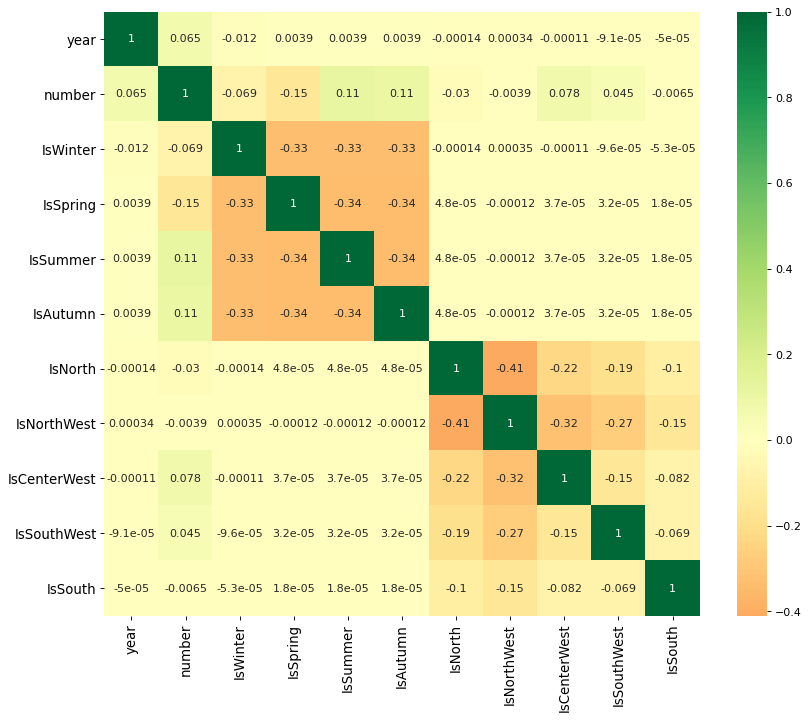

In [202]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(data1.corr(), xticklabels=data1.corr().columns, yticklabels=data1.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

From the table we see that there is a slight dependence of the number of fires on the year, month and state. Moreover, the dependence is stronger for the variables responsible for the season: spring, summer and autumn. And also for the variables responsible for the counties CenterWest and SouthWest

### Train & test

It is most rational in this dataset to consider the number of fires in the specified period as the target feature - 'number'. Because only this parameter is the most informative for us

In [13]:
test = data1["number"]
train = data1.drop(['number'], axis=1) 

X_train, X_test, y_train, y_test = train_test_split(train, test, test_size = 0.3, random_state = 42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print (N_train, N_test)

4517 1937


With the given parameters, 4517 objects will fall into the training sample

### t-SNE

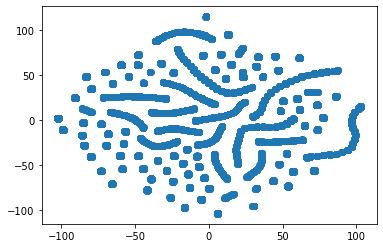

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train)

tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(X_scaled)

plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1])

Visually, the sample can be divided into 4 classes.
The boundaries of these classes pass along the lines, forming X, the objects of the classes are inside these boundaries.
Or into 2 classes, taking as one of them all the points that form lines, thereby forming X. For the second class - all the rest, not forming lines, but lying in a scatter.

### Principal component analysis

In [52]:
data1 = data1.drop(["year"], axis=1) 

test = data1["number"]
train = data1.drop(['number'], axis=1) 

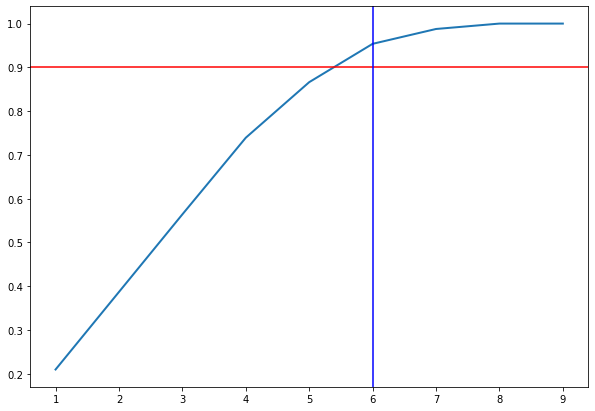

In [75]:
pca = PCA().fit(train)

plt.figure(figsize=(10,7))
plt.plot( np.array(range(1, 10)), np.cumsum(pca.explained_variance_ratio_), lw=2)
plt.axhline(0.9, c='r')
plt.axvline(6, c='b')

6 components are enough to describe 90% of the data variance

In [59]:
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i+1, 
          round(100 * np.cumsum(pca.explained_variance_ratio_)[i], 2)))
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,train.columns)))

1 component: 20.99% of initial variance
0.002 x IsWinter + -0.001 x IsSpring + -0.001 x IsSummer + -0.001 x IsAutumn + -0.495 x IsNorth + 0.847 x IsNorthWest + -0.166 x IsCenterWest + -0.100 x IsSouthWest + -0.024 x IsSouth
2 component: 38.71% of initial variance
-0.000 x IsWinter + 0.815 x IsSpring + -0.447 x IsSummer + -0.368 x IsAutumn + 0.000 x IsNorth + -0.000 x IsNorthWest + 0.000 x IsCenterWest + 0.000 x IsSouthWest + 0.000 x IsSouth
3 component: 56.42% of initial variance
-0.000 x IsWinter + -0.046 x IsSpring + -0.683 x IsSummer + 0.729 x IsAutumn + -0.000 x IsNorth + 0.000 x IsNorthWest + 0.000 x IsCenterWest + 0.000 x IsSouthWest + 0.000 x IsSouth
4 component: 73.93% of initial variance
0.866 x IsWinter + -0.289 x IsSpring + -0.289 x IsSummer + -0.289 x IsAutumn + 0.001 x IsNorth + -0.001 x IsNorthWest + 0.000 x IsCenterWest + 0.000 x IsSouthWest + 0.000 x IsSouth
5 component: 86.62% of initial variance
0.000 x IsWinter + -0.000 x IsSpring + -0.000 x IsSummer + -0.000 x IsAut

6 components describe 95% of the data variance. The largest contribution is made by the "IsSouthWest" parameter - whether the fire is located in the state in the southeast of the country, before it there is a multiplier of 0.787